In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

## Задача 1. Первичный анализ данных 

In [2]:
# Считываем данные из файла
data = pd.read_csv('weights_heights.csv', index_col='Index')

In [3]:
# Cмотрим на первые 5 записей из фрейма
data.head(n=5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


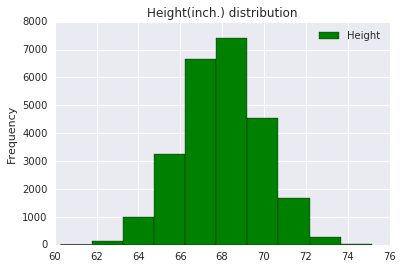

In [4]:
# Видим, что данные считываются верно. Нарисуем гистограмму
data.plot(y='Height', kind='hist', color='green', 
          title='Height(inch.) distribution')
plt.show()

In [5]:
# Создаем третий признак - индекс массы тела
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
            (height_inch / METER_TO_INCH)**2

In [6]:
# Добавляем его во фрейм
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis = 1)

In [7]:
# Проверяем фрейм, видим, что признаки добавились верным образом
data.head(n=5)

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


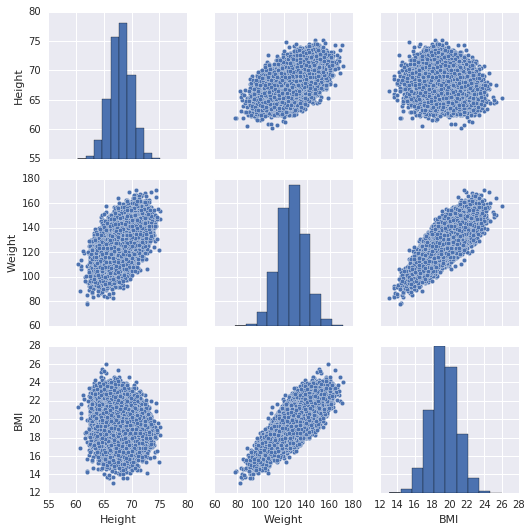

In [8]:
# С помощью pairplot() рисуем попарные зависимости признаков
sns.pairplot(data)
plt.show()

In [9]:
# Пишем функцию для определения категории веса
def weight_category(weight):
    if weight < 120:
        return 1
    if 120 <= weight <= 149:
        return 2
    if weight >= 150:
        return 3


In [10]:
# Создадим во фрейме новый блок  - категория веса
data['weight_cat'] = data['Weight'].apply(weight_category)


In [11]:
# Проверяем фрейм, видим, что признаки добавились верным образом
data.head(n=5)

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2


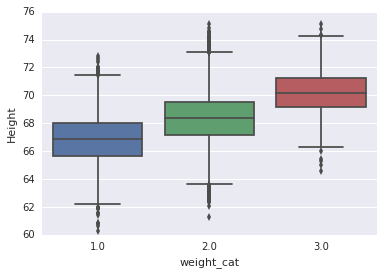

In [12]:
# Отобразим зависимость роста от весовой категории в Boxplot
sns.boxplot(y='Height', x='weight_cat', data=data)
plt.show()


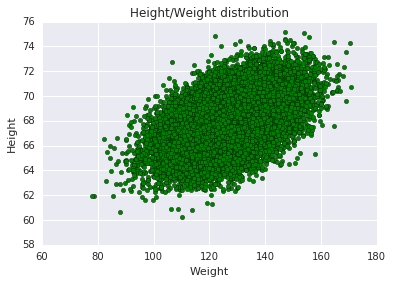

In [13]:
# Нарисуем scatter plot зависимости роста от веса
data.plot(y='Height', x='Weight', kind='scatter', color='green', 
          title='Height/Weight distribution')
plt.show()

## Задача 2. Минимизация квадратичной ошибки

In [14]:
# Напишем функцию квадратичной ошибки
def error(w):
    s=0
    n=len(data)
    for i in range(n):
        s = s + (data['Height'][i+1] - (w[0] + w[1]*data['Weight'][i+1]))**2
    return s   

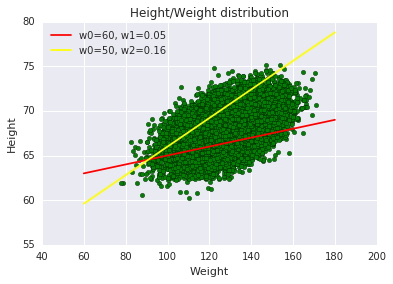

In [15]:
# Проведем тестовые прямые в пространстве признаков 
data.plot(y='Height', x='Weight', kind='scatter', color='green', 
          title='Height/Weight distribution')
w=[[60, 0.05],[50,0.16]] #возможнные параметры w0, w1
x = np.linspace(60, 180, 1000)
y1=w[0][0]+w[0][1]*x
y2=w[1][0]+w[1][1]*x
plt.plot(x, y1, label='w0=60, w1=0.05', color='red')
plt.plot(x, y2, label='w0=50, w2=0.16', color='yellow')
plt.legend(loc='upper left')

plt.show()

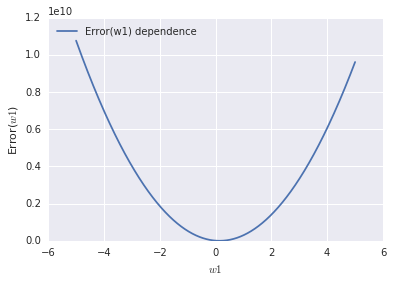

In [16]:
# Построим график зависимости функции ошибки от w1 при фиксированном w0
x = np.linspace(-5,5, 10000)
y = error([50,x])
plt.plot(x,y, label='Error(w1) dependence ')
plt.ylabel('Error($w1$)')
plt.xlabel('$w1$')
plt.legend(loc='upper left')
plt.show()

In [17]:
from scipy.optimize import minimize_scalar

In [18]:
# Найдем его минимум с помощью метода minimize_scalar
def f(x):
    return error([50, x])
res = minimize_scalar(f, bounds=(-5,5), method='bounded')
res.x

0.14109203728834441

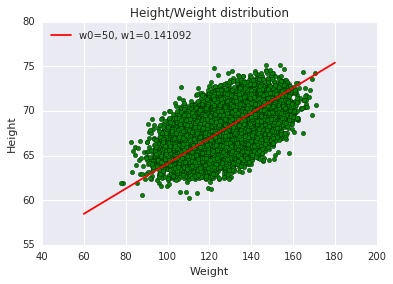

In [19]:
# Нарисуем данное приближение в пространстве признаков
data.plot(y='Height', x='Weight', kind='scatter', color='green', 
          title='Height/Weight distribution')
w=[50, res.x]
x = np.linspace(60, 180, 1000)
y=w[0]+w[1]*x
plt.plot(x, y, label='w0=%d, w1=%f' % (w[0], w[1]),  color='red')
plt.legend(loc='upper left')
plt.show()

In [20]:
from mpl_toolkits.mplot3d import Axes3D

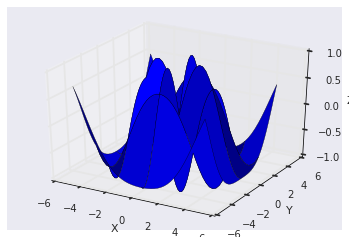

In [21]:
# Нарисуем трехмерный график функции sin(sqrt(x^2+y^2))
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X,Y = np.meshgrid(X,Y)# с помощью метода meshgrid сводим вектора X и Y в матрицу
Z = np.sin(np.sqrt(X**2+Y**2))

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

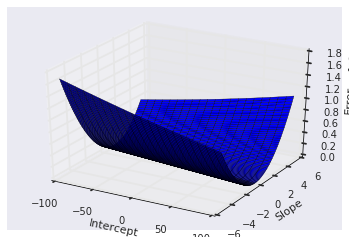

In [22]:
# Нарисуем трехмерный график функции ошибки
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-100, 100, 1)
Y = np.arange(-5, 5, 0.01)
X,Y = np.meshgrid(X,Y)# с помощью метода meshgrid сводим вектора X и Y в матрицу
Z = error([X,Y])

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [24]:
# С помощью метода minimize найдем минимум функции ошибки
point = optimize.minimize(error, [0, 0], bounds=((-100,100),(-5,5)))
print point

NameError: name 'optimize' is not defined

In [ ]:
# Итоговый результат в пространстве признаков
data.plot(y='Height', x='Weight', kind='scatter', color='green', 
          title='Height/Weight distribution')
w=point.x
x = np.linspace(60, 180, 1000)
y=w[0]+w[1]*x
plt.plot(x, y, label='w0=%d, w1=%f' % (w[0], w[1]),  color='blue')
plt.legend(loc='upper left')
plt.show()